# Model 34


|Markets|    X  |  Y  |  G |  W1 |  W2  |     CONS1 |  CONS2 |  GOVT|
|-------|-------|-----|----|-----|------|-----------|--------|------|
|  PX   |  100  |     |    | -70 | -30  |           |        |      |     
|  PY   |       |100  |    | -30 | -70  |           |        |      |     
|  PG   |       |     | 50 |     |      |           |        |   -50|      
|  PL   |  -50  |-30  |-20 |     |      |        50 |     50 |      |      
|  PK   |  -30  |-50  |-20 |     |      |        50 |     50 |      |       
|  TAX  |  -20  |-20  |-10 |     |      |           |        |    50|       
|  PW1  |       |     |    |  125|      |      -125 |        |      |      
|  PW2  |       |     |    |     |  125 |           |   -125 |      |      
|  PG1  |       |     |    |  -25|      |        25 |        |      |      
|  PG2  |       |     |    |     |  -25 |           |     25 |      |      


In [25]:
using MPSGE_MP

In [26]:
M34 = MPSGEModel()

@parameter(M34, TAX, .25)

@sectors(M34, begin
	X, (description = "Activity level for sector X",)
	Y, (description = "Activity level for sector Y",)
	G, (description = "Activity level for sector G  (public provision)",)
	W1, (description = "Activity level for sector W1 (consumer 1 welfare index)",)
	W2, (description = "Activity level for sector W2 (consumer 2 welfare index)",)
end)

@commodities(M34, begin
	PX, (description = "Price index for commodity X",)
	PY, (description = "Price index for commodity Y",)
	PG, (description = "Price index for commodity G(marginal cost of public output)",)
	PL, (description = "Price index for primary factor L (net of tax)",)
	PK, (description = "Price index for primary factor K",)
	PW1, (description = "Price index for welfare (consumer 1)",)
	PW2, (description = "Price index for welfare (consumer 2)",)
	PG1, (description = "Private valuation of the public good (consumer 1)",)
	PG2, (description = "Private valuation of the public good (consumer 2)",)
end)

@consumers(M34, begin
	CONS1, (description = "Consumer 1",)
	CONS2, (description = "Consumer 2",)
	GOVT, (description = "Government",)
end)

@auxiliaries(M34, begin
	LGP, (description = "Level of government provision",)
end)


@production(M34, X, [s=1,t=0], begin
    @output(PX, 100, t)
    @input(PL, 50, s, taxes=[Tax(GOVT, TAX)], reference_price = 1.25)
    @input(PK, 30, s, taxes=[Tax(GOVT, TAX)], reference_price = 1.25)
end)

@production(M34, Y, [s=1,t=0], begin
    @output(PY, 100, t)
    @input(PL, 30, s, taxes=[Tax(GOVT, TAX)], reference_price = 1.25)
    @input(PK, 50, s, taxes=[Tax(GOVT, TAX)], reference_price = 1.25)
end)

@production(M34, G, [s=1,t=0], begin
    @output(PG, 50, t)
    @input(PL, 20, s, taxes=[Tax(GOVT, TAX)], reference_price = 1.25)
    @input(PK, 20, s, taxes=[Tax(GOVT, TAX)], reference_price = 1.25)
end)

@production(M34, W1, [s=1,t=0], begin
    @output(PW1, 125, t)
    @input(PX, 70, s)
    @input(PY, 30, s)
    @input(PG1, 50, s, reference_price = .5)
end)

@production(M34, W2, [s=1,t=0], begin
    @output(PW2, 125, t)
    @input(PX, 30, s)
    @input(PY, 70, s)
    @input(PG2, 50, s, reference_price = .5)
end)

@demand(M34, GOVT, begin
    @final_demand(PG, 50)
end,begin
    
end)


@demand(M34, CONS1, begin
    @final_demand(PW1, 125)
    end,begin
    @endowment(PL, 50)
    @endowment(PK, 50)
    @endowment(PG1, 50*LGP)
end)

@demand(M34, CONS2, begin
    @final_demand(PW2, 125)
end,begin
    @endowment(PL,50)
    @endowment(PK, 50)
    @endowment(PG2, 50*LGP)
end)

@aux_constraint(M34, LGP,
    LGP - G
);

# Benchmark

In [27]:
set_start_value(LGP,1)
set_start_value(PG1,.5)
set_start_value(PG2,.5)

solve!(M34, cumulative_iteration_limit=0)
generate_report(M34)

Reading options file C:\Users\MPHILL~1\AppData\Local\Temp\jl_EBEF.tmp
 > cumulative_iteration_limit 0
Read of options file complete.

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris
Preprocessed size   : 17

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     1     1 0.0000e+00           I 0.0e+00 0.0e+00 (zero_profit[X)

Major Iterations. . . . 0
Minor Iterations. . . . 0
Restarts. . . . . . . . 0
Crash Iterations. . . . 0
Gradient Steps. . . . . 0
Function Evaluations. . 1
Gradient Evaluations. . 1
Basis Time. . . . . . . 0.000000
Total Time. . . . . . . 0.000000
Residual. . . . . . . . 0.000000e+00
Postsolved residual: 0.0000e+00


Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Default price normalization using income for CONS2 - This value is fixed. Unfix with unfix(CONS2).

Row,var,value,margin
,GenericV…,Float64,Float64
1,W1,1.0,0.0
2,X,1.0,0.0
3,W2,1.0,0.0
4,Y,1.0,0.0
5,G,1.0,0.0
6,PW2,1.0,0.0
7,PL,1.0,0.0
8,PG,1.0,0.0
9,PG2,0.5,0.0


# Counterfactual 1

In [28]:
set_value!(TAX, .2)

solve!(M34)
generate_report(M34)

Reading options file C:\Users\MPHILL~1\AppData\Local\Temp\jl_EC0F.tmp
 > cumulative_iteration_limit 10000
Read of options file complete.

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 17

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             1.3897e+01             0.0e+00 (income_balance[GOVT)
    1     1     0    17 1.1590e+00  1.0e+00    0.0e+00 (income_balance[CONS1)
pn_search terminated: no basis change.

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     2     2 1.1590e+00           I 0.0e+00 6.4e-01 (income_balance[)
    1     1     3     3 5.6540e-02  1.0e+00 SO 0.0e+00 3.7e-02 (market_clearanc)
    2     1     4     4 6.1981e-05  1.0e+00 SO 0.0e+00 4.6e-05 (market_clearanc)
    3     1     5     5 8.7727e-11  1.0e+00 SO 0.0e+00 7.6e-11 (market_clearanc)

Major Iterations. . . . 3
Minor Iteratio

Row,var,value,margin
,GenericV…,Float64,Float64
1,W1,0.996201,-2.28226e-11
2,X,1.04167,-1.42109e-14
3,W2,0.996201,-4.05365e-12
4,Y,1.04167,-2.84217e-14
5,G,0.833333,-2.39808e-14
6,PW2,1.00381,1.31024e-11
7,PL,1.0,6.11067e-13
8,PG,0.96,0.0
9,PG2,0.6,2.32134e-11


# Counterfactual 2

In [29]:
set_value!(TAX, .3)

solve!(M34)
generate_report(M34)

Reading options file C:\Users\MPHILL~1\AppData\Local\Temp\jl_EC20.tmp
 > cumulative_iteration_limit 10000
Read of options file complete.

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 17

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             1.1086e+01             0.0e+00 (income_balance[GOVT)
    1     1     0    17 1.1900e+00  1.0e+00    0.0e+00 (income_balance[CONS1)
pn_search terminated: no basis change.

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     2     2 1.1900e+00           I 0.0e+00 6.4e-01 (income_balance[)
    1     1     3     3 6.0924e-02  1.0e+00 SO 0.0e+00 4.1e-02 (market_clearanc)
    2     1     4     4 5.7475e-05  1.0e+00 SO 0.0e+00 4.5e-05 (market_clearanc)
    3     1     5     5 5.7563e-11  1.0e+00 SO 0.0e+00 5.3e-11 (market_clearanc)

Major Iterations. . . . 3
Minor Iteratio

Row,var,value,margin
,GenericV…,Float64,Float64
1,W1,0.997247,-1.13971e-11
2,X,0.961538,0.0
3,W2,0.997247,-1.90425e-12
4,Y,0.961538,-1.42109e-14
5,G,1.15385,-1.77636e-15
6,PW2,1.00276,6.53699e-12
7,PL,1.0,2.98428e-13
8,PG,1.04,-1.42109e-14
9,PG2,0.433333,1.51346e-11


In [30]:
using DataFrames
using Plots

In [36]:
df = DataFrame([name => [] for name in [:tax_rate,:welfare1, :welfare2]])

set_silent(M34)

for tax_rate∈0.1:.01:.5
    set_value!(TAX, tax_rate)

    solve!(M34)
    
    push!(df,
        [tax_rate, value(PW1), value(PW2)]
    )
end

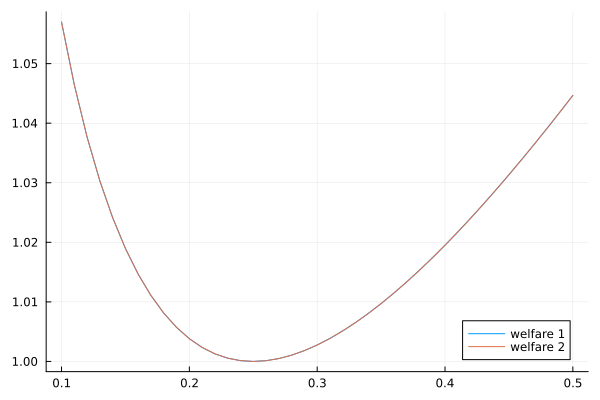

In [37]:
plot(df[!,:tax_rate],df[!,:welfare1], label = "welfare 1")
plot!(df[!,:tax_rate],df[!,:welfare2], label = "welfare 2")

In [41]:
argmin(x -> x[:welfare1], eachrow(df))

Row,tax_rate,welfare1,welfare2
,Any,Any,Any
16,0.25,1.0,1.0
